In [6]:
import sys
import pandas as pd
import Quandl
import json

sys.path.append('..')
from Data.StockDataManager import *
settings = Settings()

In [7]:
def store_ETF_data(tickers) :
    from Data.StockDataManager import Settings
    settings = Settings()
    db = settings.get_mongo_db(local=True)
    coll = db['ETF']
    
    for t in tickers:
        print 'downloadng {t}'.format(t=t)
        df = Quandl.get(t)
        df['name'] = t
        df = df.reset_index()
        records = json.loads(df.T.to_json()).values()
        print "uploading {t}".format(t=t)
        coll.insert_many(records)
        
def get_ETF_data(tickers) :
    data = {}
    settings = Settings()
    coll = settings.get_mongo_coll('ETF', local=True)

    for t in tickers:
        df = pd.DataFrame(list(coll.find({'name': t})))
        df['Date'] = pd.to_datetime(df['Date'] * 1000 * 1000)
        df = df.set_index('Date')
        df = df.sort_index()
        data[t] = df
        
    return data

def get_agg_data(tickers) :
    data = get_ETF_data(tickers)
    df_prices = pd.DataFrame()

    for t in tickers:
        df_prices[t] = data[t]['Close']
    
    df_returns = df_prices.pct_change()
    df_returns = df_returns.fillna(0)
    return df_prices, df_returns



In [51]:
tickers = ['GOOG/NYSE_SPY', #S&P 500 ETF 
           'GOOG/AMEX_EWJ', # iShares MSCI Japan ETF
           'GOOG/NYSE_IEV', # iShares Europe ETF
           'GOOG/NYSE_VWO', # Vanguard Emerging Market Stock ETF
           
           #'GOOG/NYSE_VNQ', # Vanguard MSCI US Reits
           'GOOG/NYSE_IYR', # iShares U.S. Real Estate ETF
           'GOOG/NYSE_RWX', # SPDR DJ Wilshire Intl Real Estate ETF
           
           'GOOG/NYSEARCA_TLT',  # 20 Years Treasury ETF
           'GOOG/NYSEARCA_TLH',  # 15-20 Years Treasury
           
           'GOOG/AMEX_GSG', # GSCI Commodity-Indexed Trust Fund
           'GOOG/NYSEARCA_GLD',  # SPDR Gold ETF
           
          ]

store_ETF_data(['GOOG/NYSE_IYR'])

downloadng GOOG/NYSE_IYR
uploading GOOG/NYSE_IYR



## 弥财投资的ETF
There are 8 etfs

In [25]:
micai_tickers = ['GOOG/NYSE_VWO', 
                'GOOG/NYSE_VPL', 
                'GOOG/NYSE_VGK', 
                'GOOG/NYSE_VTI']
store_ETF_data(['GOOG/NYSE_VWO'])

downloadng GOOG/NYSE_VWO
uploading GOOG/NYSE_VWO


In [27]:
import matplotlib 
%matplotlib inline
from Data.TimeSeries import TimeSeries
from Data.StockDataManager import Settings
ts = TimeSeries(Settings())
df_prices = ts.get_agg_data(micai_tickers)



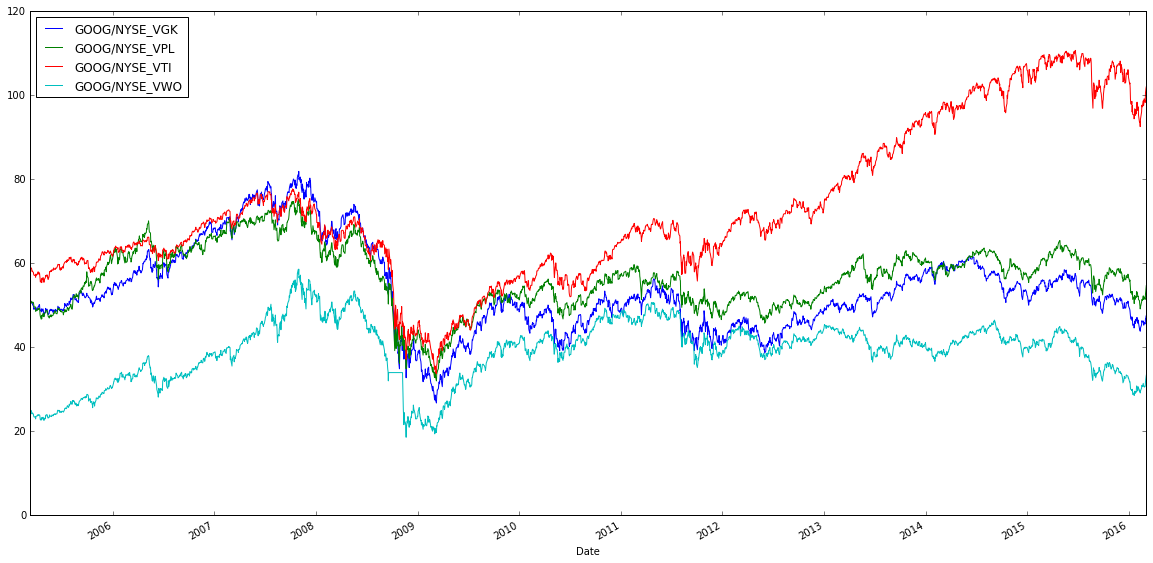

In [32]:
df_prices[:,:,'price'].dropna().plot(figsize=[20,10])